# Stock Price Prediction using XGBoost and ARIMA

This notebook predicts the **Close** price of the Dow Jones Industrial Average using two models:

- **XGBoost:** A supervised machine learning model using lag features.
- **ARIMA:** A time series forecasting model.

The predictions from both models are then plotted against the actual values.

C:\Users\madha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\madha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\madha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

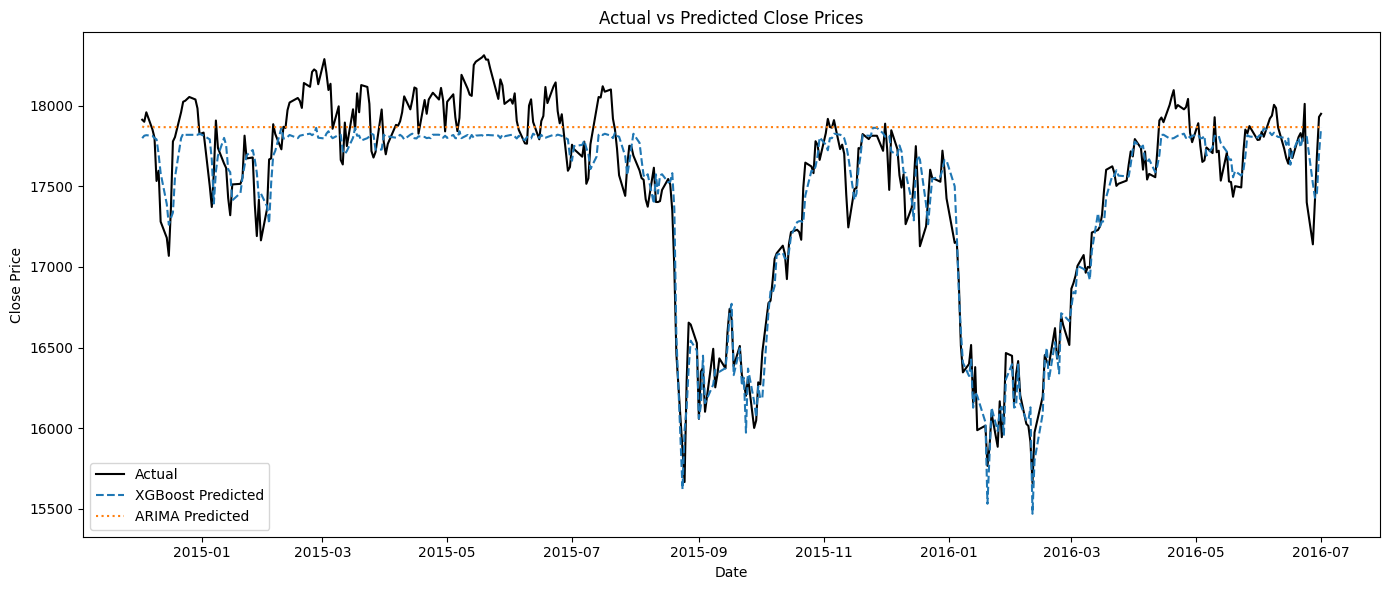

XGBoost Relative Errors:
MSE: 33304.67, RMSE: 182.50

ARIMA Relative Errors:
MSE: 529340.62, RMSE: 727.56


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('upload_DJIA_table.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# --------------------------
# XGBoost Model
# --------------------------

# Create lag features for XGBoost
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)
df.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Volume', 'Close_lag1', 'Close_lag2', 'Close_lag3']
X = df[features]
y = df['Close']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# --------------------------
# ARIMA Model
# --------------------------
arima_data = df['Close']
train_size = int(len(arima_data) * 0.8)
train, test = arima_data[:train_size], arima_data[train_size:]

# Fit ARIMA model (order can be tuned)
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()
arima_preds = arima_result.forecast(steps=len(test))

# --------------------------
# Plotting Results
# --------------------------
plt.figure(figsize=(14, 6))

# Plot actual Close prices (using the tail of the dataset for the XGBoost test period)
plt.plot(df.index[-len(y_test):], y_test, label='Actual', color='black')

# Plot XGBoost predictions
plt.plot(df.index[-len(y_test):], xgb_preds, label='XGBoost Predicted', linestyle='--')

# Plot ARIMA predictions (using the test set index)
plt.plot(test.index, arima_preds, label='ARIMA Predicted', linestyle=':')

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = root_mean_squared_error(y_test, xgb_preds)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for ARIMA
arima_mse = mean_squared_error(test, arima_preds)
arima_rmse = root_mean_squared_error(test, arima_preds)

# Print the results
print("XGBoost Relative Errors:")
print(f"MSE: {xgb_mse:.2f}, RMSE: {xgb_rmse:.2f}")

print("\nARIMA Relative Errors:")
print(f"MSE: {arima_mse:.2f}, RMSE: {arima_rmse:.2f}")

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import spearmanr

# Calculate Mean Absolute Percentage Error (MAPE) for XGBoost
xgb_mape = mean_absolute_percentage_error(y_test, xgb_preds)

# Calculate Spearman Correlation for XGBoost
xgb_spearman_corr, _ = spearmanr(y_test, xgb_preds)

# Calculate Mean Absolute Percentage Error (MAPE) for ARIMA
arima_mape = mean_absolute_percentage_error(test, arima_preds)

# Calculate Spearman Correlation for ARIMA
arima_spearman_corr, _ = spearmanr(test, arima_preds)

# Print the results
print("\nXGBoost Additional Metrics:")
print(f"MAPE: {xgb_mape:.2%}")
print(f"Spearman Correlation: {xgb_spearman_corr:.2f}")

print("\nARIMA Additional Metrics:")
print(f"MAPE: {arima_mape:.2%}")
print(f"Spearman Correlation: {arima_spearman_corr:.2f}")


XGBoost Additional Metrics:
MAPE: 0.82%
Spearman Correlation: 0.86

ARIMA Additional Metrics:
MAPE: 2.87%
Spearman Correlation: 0.05
